# Simulating Horizontal Motion

## Main Code for the simulation

- Contains calculation of velocity and the displacement

In [1]:
import pygame
import os
import sys
sys.path.append('./src')
from parallax import Parallax 

SCREEN_WIDTH = 1200
SCREEN_HEIGHT = 600
FPS = 60

parallax = Parallax(SCREEN_WIDTH, [
    "assets/far_clouds.png",
    "assets/near_clouds.png",
    "assets/far_mountains.png",
    "assets/mountains.png",
    "assets/trees.png",
])

def load_van_frames(path):
    frames = []
    for file_name in sorted(os.listdir(path)):
        if file_name.endswith('.png'):
            frame = pygame.image.load(os.path.join(path, file_name))
            aspect_ratio = frame.get_width() / frame.get_height()
            frame = pygame.transform.scale(frame, (200, int(200 / aspect_ratio)))
            frames.append(frame)
    return frames

    # Load the road asset
road_image = pygame.image.load("assets/road.png")
road_width, road_height = road_image.get_size()
road_aspect_ratio = road_width / road_height
road_image = pygame.transform.scale(road_image, (SCREEN_WIDTH, int(SCREEN_WIDTH / road_aspect_ratio)))

    # Load all frames of the van animation
van_frames = load_van_frames("assets/van_frames/")



total_frames = len(van_frames)
frame_interval = 5  # Frames per animation step

def main(a):
    if pygame.init():
        pygame.quit()

    pygame.init()
    screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
    pygame.display.set_caption("Horizontal Motion (Uniform Motion)")
    
    bg_position_x = 0
    velocity = 0
    acceleration = a
    max_velocity = 80
    total_distance = 0
    running = True
    clock = pygame.time.Clock()

    font = pygame.font.Font(None, 24)
    current_frame_index = 0
    road_x_position = 0  # Initial position of the road


    target_distance = 500  # Set your target distance in meters
    elapsed_time = 0
    measuring_time = False

    # Data for graphs
    velocity_data = []
    displacement_data = []

    # Load sky image once
    sky_image = pygame.image.load("assets/sky.png")
    sky_image = pygame.transform.scale(sky_image, (SCREEN_WIDTH, int(SCREEN_WIDTH * sky_image.get_height() / sky_image.get_width())))

    # Main game loop
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        # Update frame for van animation
        if int(elapsed_time * FPS) % frame_interval == 0:
            current_frame_index = (current_frame_index + 1) % total_frames
        van_sprite = van_frames[current_frame_index]

        # Change in time
        delta_time = clock.tick(FPS) / 1000

        # Start timing when the object begins moving
        if velocity > 0 and not measuring_time:
            measuring_time = True

        # Physics calculation (velocity and position)
        velocity = min(max_velocity, velocity + acceleration * delta_time)
        displacement = velocity * delta_time  # Simplified for smooth motion
        bg_position_x += displacement
        total_distance += displacement

        # Normalize bg_position_x to prevent overflow
        if bg_position_x > SCREEN_WIDTH:
            bg_position_x -= SCREEN_WIDTH

        # Check if target distance is reached
        if total_distance >= target_distance and measuring_time:
            measuring_time = False
            print(f"Time to travel {target_distance} meters: {elapsed_time:.2f} seconds")
            running = False

        if measuring_time:
            elapsed_time += delta_time
            velocity_data.append((elapsed_time, velocity))
            displacement_data.append((elapsed_time, total_distance))

        # Scroll the road
        road_x_position -= velocity * delta_time
        if road_x_position <= -SCREEN_WIDTH:
            road_x_position += SCREEN_WIDTH

        # Draw everything
        screen.blit(sky_image, (0, 0))
        parallax.draw(screen, bg_position_x)

        # Draw the road
        road_y_position = SCREEN_HEIGHT - road_image.get_height() + 130
        screen.blit(road_image, (road_x_position, road_y_position))
        screen.blit(road_image, (road_x_position + SCREEN_WIDTH, road_y_position))

        # Draw UI text
        draw_font(f"Acceleration: {acceleration:.2f} m/s^2", screen, font, 10, 10)
        draw_font(f"Target Distance: {target_distance}m", screen, font, 10, 85)
        draw_font(f"Velocity: {velocity:.2f} m/s", screen, font, 10, 35)
        draw_font(f"Distance Traveled: {total_distance:.2f} m", screen, font, 10, 60)
        draw_font(f"Elapsed Time: {elapsed_time:.2f}s", screen, font, 10, 110)

        # Draw the van
        screen.blit(van_sprite, (50, SCREEN_HEIGHT - 15 - van_sprite.get_height()))
        pygame.display.flip()

    pygame.quit()
    return elapsed_time, velocity_data, displacement_data

def draw_sky(screen):
    sky = pygame.image.load("assets/sky.png")
    sky = pygame.transform.scale(sky, (SCREEN_WIDTH, int(SCREEN_WIDTH * sky.get_height() / sky.get_width())))
    screen.blit(sky, (0, 0))

def draw_font(text, screen, font, x, y, color=(255, 255, 255)):
    text = font.render(text, True, color)
    screen.blit(text, (x, y))



pygame 2.6.1 (SDL 2.28.4, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


KeyboardInterrupt: 

In [ ]:
elapsed_time = []
accelaration = [10, 20, 30, 40, 50]
velocity_data = []
displacement_data = []

for a in accelaration:
    time, velo_data, disp_data = main(a)
    elapsed_time.append(time)
    velocity_data.append(velo_data)
    displacement_data.append(disp_data)

print(elapsed_time)
print(velocity_data)
print(displacement_data)


KeyboardInterrupt: 

## Plotting the Results

- y = Elapsed Time to reach a fixed distance
- x = accelaration

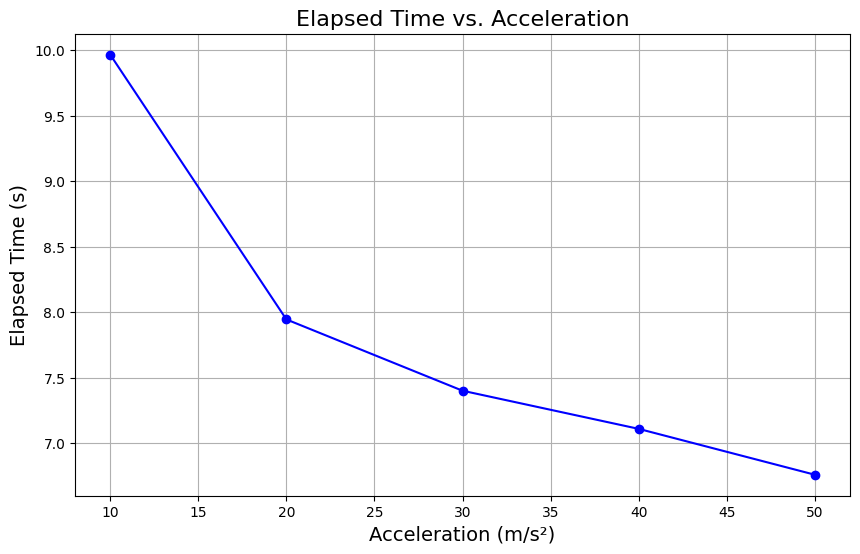

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
plt.plot(accelaration, elapsed_time, marker='o', linestyle='-', color='b')
plt.title('Elapsed Time vs. Acceleration', fontsize=16)
plt.xlabel('Acceleration (m/s²)', fontsize=14)
plt.ylabel('Elapsed Time (s)', fontsize=14)
plt.grid(True)
plt.show()


## Velocity vs Time Graph for Each Acceleration (10, 20, 30, 40, 50)

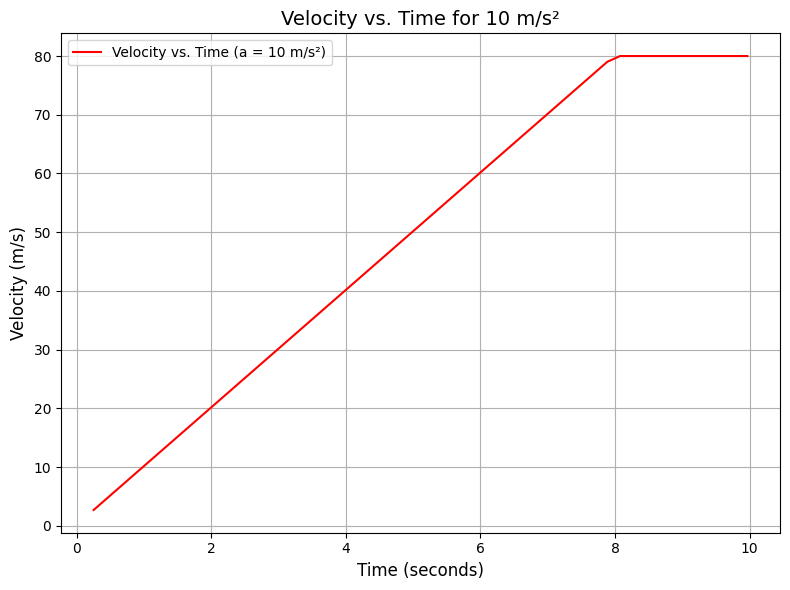

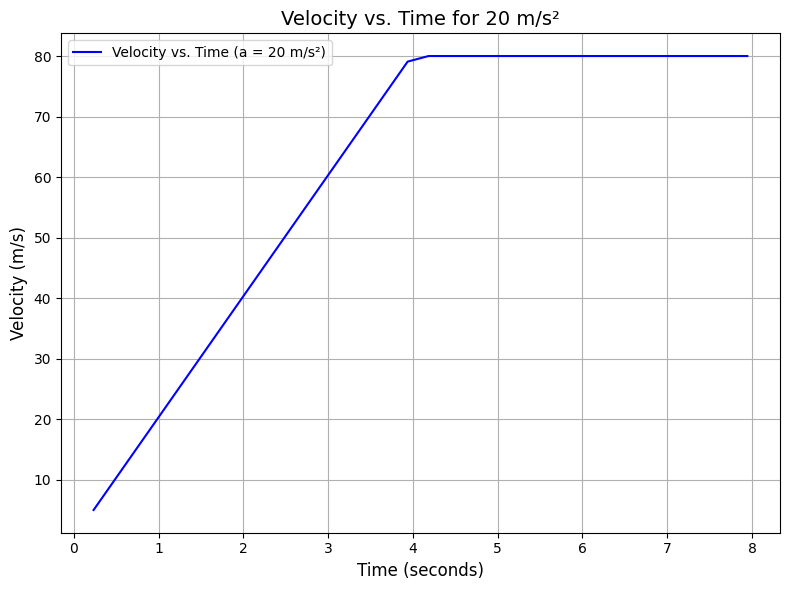

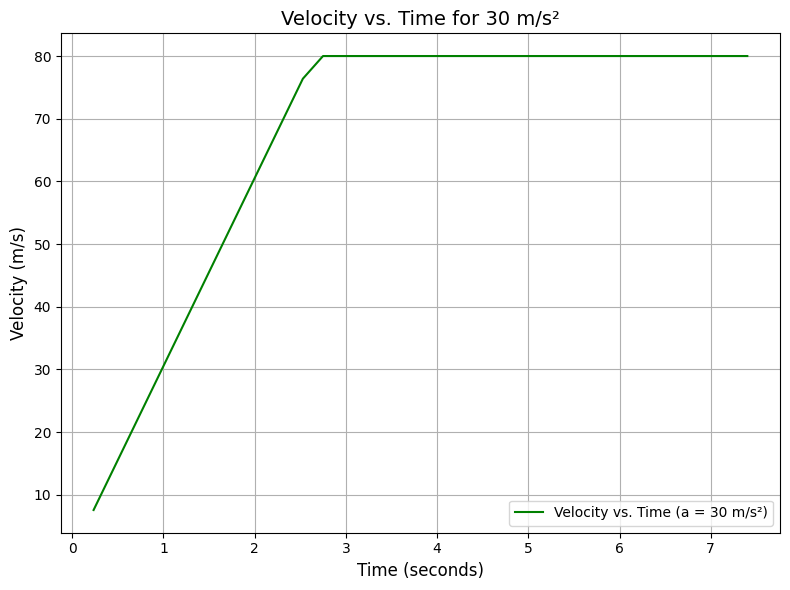

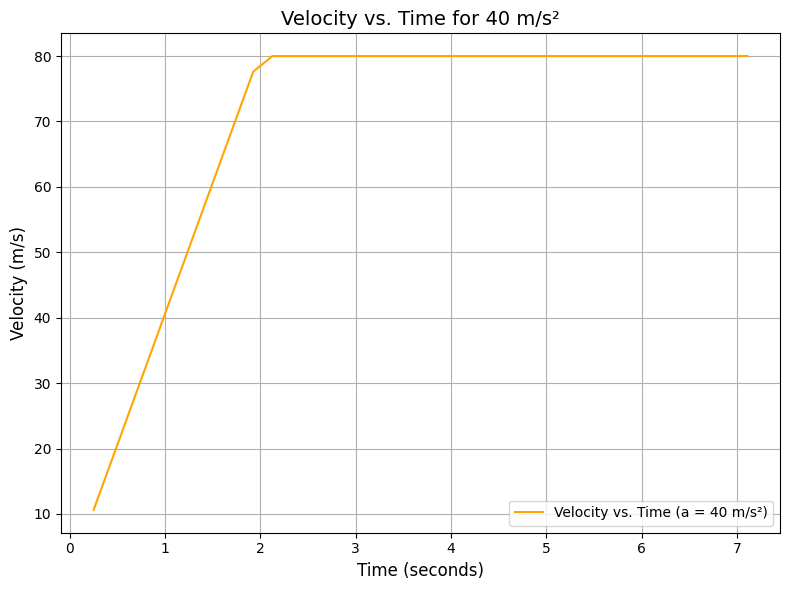

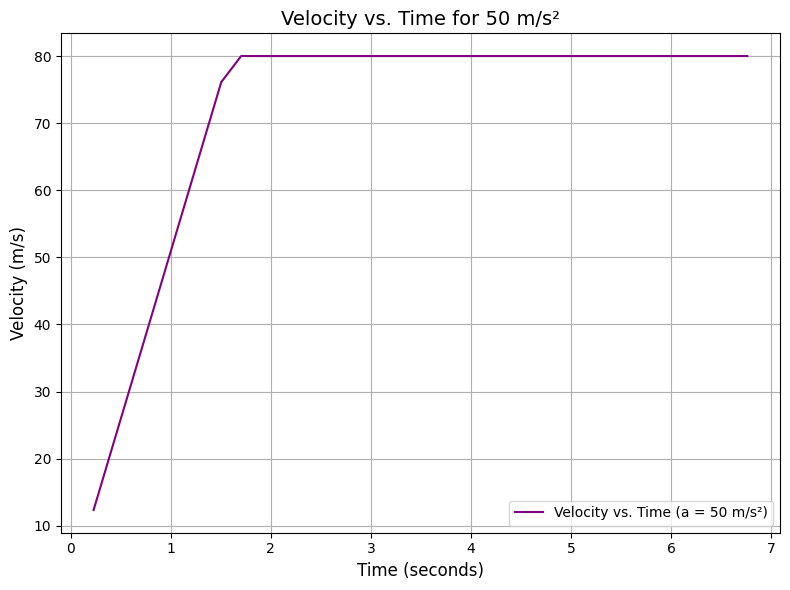

In [9]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

for i in range(len(accelaration)):
    # Extract time and velocity for the current acceleration
    times = [point[0] for point in velocity_data[i]]
    velocities = [point[1] for point in velocity_data[i]]
    
    # Plot velocity vs. time for the current acceleration
    plt.figure(figsize=(8, 6))
    plt.plot(times, velocities, label=f'Velocity vs. Time (a = {accelaration[i]} m/s²)', color=colors[i % len(colors)])
    
    # Customize the plot
    plt.title(f"Velocity vs. Time for {accelaration[i]} m/s²", fontsize=14)
    plt.xlabel("Time (seconds)", fontsize=12)
    plt.ylabel("Velocity (m/s)", fontsize=12)
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.legend()
    plt.show()

## Displacement vs Time Graph for each Acceleration (10, 20, 30, 40, 50)

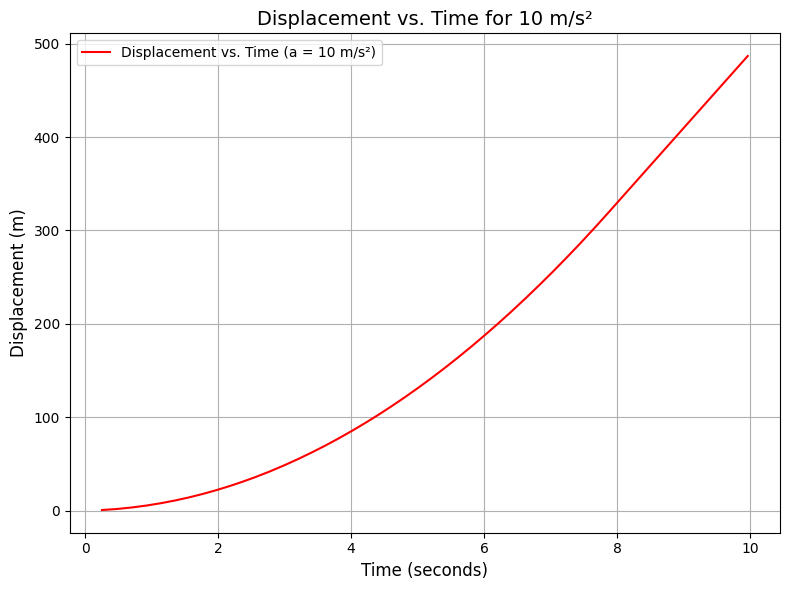

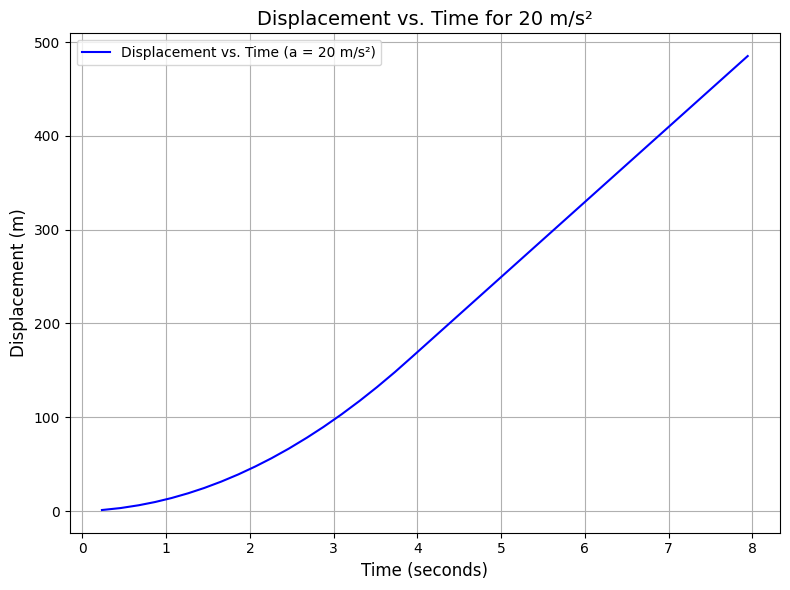

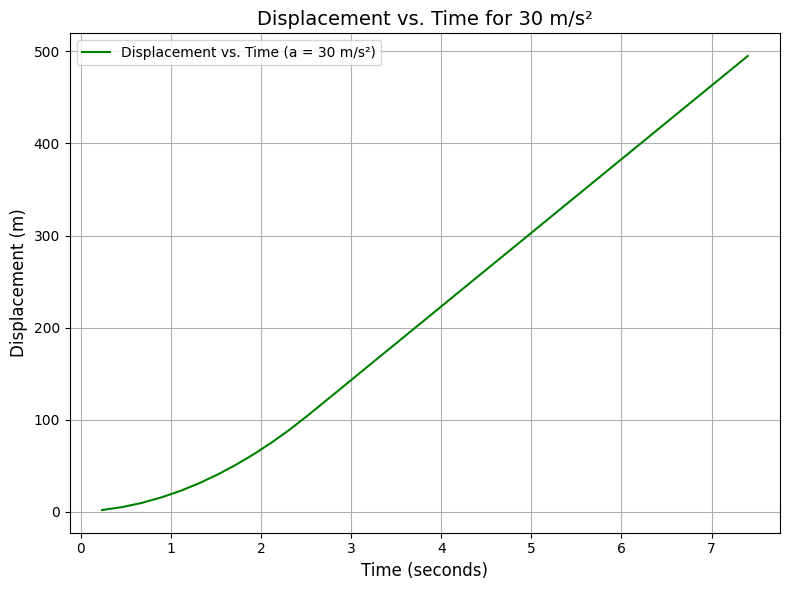

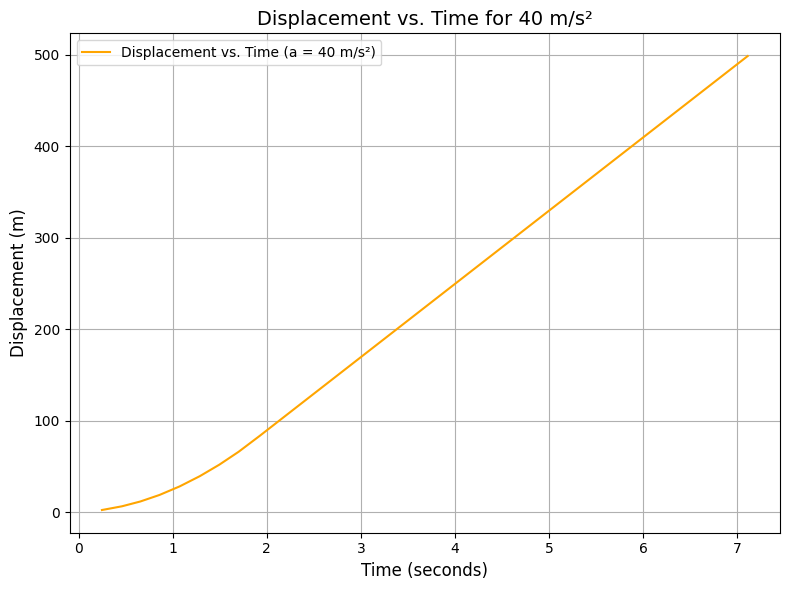

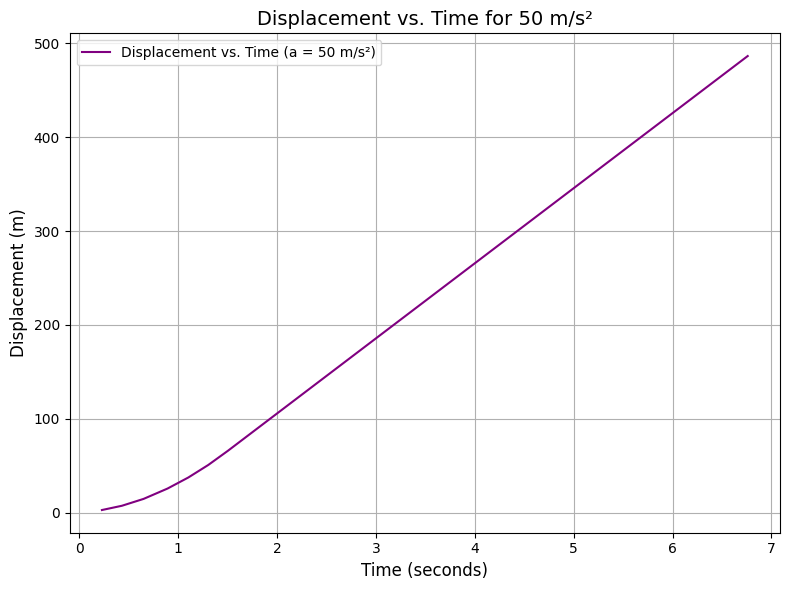

In [10]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

for i in range(len(accelaration)):
    # Extract time and displacement for the current acceleration
    times = [point[0] for point in displacement_data[i]]
    current_displacement = [point[1] for point in displacement_data[i]]
    
    # Plot displacement vs. time for the current acceleration
    plt.figure(figsize=(8, 6))
    plt.plot(times, current_displacement, 
             label=f'Displacement vs. Time (a = {accelaration[i]} m/s²)', 
             color=colors[i % len(colors)])
    
    # Customize the plot
    plt.title(f"Displacement vs. Time for {accelaration[i]} m/s²", fontsize=14)
    plt.xlabel("Time (seconds)", fontsize=12)
    plt.ylabel("Displacement (m)", fontsize=12)
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.legend()
    plt.show()